///---
layout: post
title: "Computed Tomography (CT) 촬영의 원리"
comments: true
share: true
date: 2019-10-18 22:33:00
description: CT의 원리와 Python 예제 코드를 소개한다.
tags: python math
toc: true
sitemap :
    changefreq : daily
    priority : 1.0
///---

# Computed Tomography (CT) 촬영의 원리

## Computed Tomography란?

CT는 아래 그림과 같이 내부 상태를 알고자 하는 부위에 X-Ray를 찍고 X-Ray 장비를 회전시키며 다양한 각도에서 X-Ray를 찍은 후 X-Ray 정보를 합성하여 내부의 상태를 알아내는 것이다.

<figure>
    <img src='../assets/images/PrincipleOfCT/CT_Figure_dark.jpg' alt='CT' width="633" />
    <figcaption class="figure-caption">CT [1]</figcaption>
</figure>

X-Ray를 회전하면서 촬영하면 왜 내부의 정보를 정확하게 알 수 있는 것일까?
  
X-Ray 촬영은 Figure 1과 같이 X-Ray가 투과하면서 감쇄되는 값을 측정하는 것이다. (네모 안의 값이 감쇄 값)  
하나의 방향에서만 X-Ray 촬영을 하면 투과한 모든 물질의 감쇄 값 합을 알 수 있을 뿐 물질의 위치나 물질 각각의 감쇄 값을 알지 못한다.  
즉 Figure 1의 (a)와 (b)는 X-Ray 촬영 결과에선 동일하게 보인다.

<figure>
    <img src='../assets/images/PrincipleOfCT/1_X-ray_dark.png' alt='Figure 1' width="858" />
    <figcaption class="figure-caption">Figure 1</figcaption>
</figure>  

하지만 X-Ray 장비를 회전 시켜서 물체를 다른 각도로 촬영하면 Figure 1와는 다르게 (a)와 (b)의 촬영 결과는 달라지게 된다.

<figure>
    <img src='../assets/images/PrincipleOfCT/1_X-ray2_dark.png' alt='Figure 2' width="858" />
    <figcaption class="figure-caption">Figure 2</figcaption>
</figure>  

즉 CT는 X-Ray 촬영을 여러 각도에서 수행하여 다양한 정보를 수집하고 그 정보를 조합하여 물체 내부의 영상을 추출하는 방식이다. 정보를 조합하는 방법은 아래에서 수학적으로 설명한다.

## 수학적 접근

### Radon transform
작성중

### Fourier slice theorem
작성중

### Convolution backprojection
작성중

## 예제 코드

In [1]:
# Third party imports
from jupyterthemes import jtplot

# %% Set Theme
jtstyle = 'chesterish'
colormap = 'mako'
jtplot.style(jtstyle)

### 원본 이미지

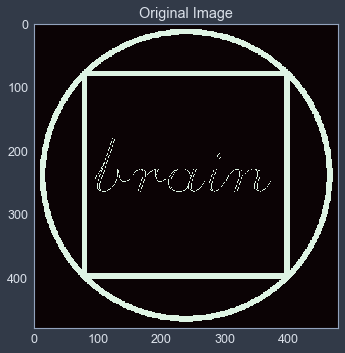

In [2]:
# Third party imports
import cv2
from numpy import sqrt, array
from matplotlib.pyplot import subplots
from numpy.core.numeric import zeros

# %% Generate img
n_size = 480

img = zeros((n_size, n_size))
radius = n_size // 2 - 14
center = (n_size // 2 - 1, n_size // 2 - 1)

cv2.circle(img,
           center,
           radius,
           255,
           7)

left_top = array(center) - array((radius / sqrt(2), radius / sqrt(2)))
left_top = (int(left_top[0]), int(left_top[1]))
right_bottom = array(center) + array((radius / sqrt(2), radius / sqrt(2)))
right_bottom = (int(right_bottom[0]), int(right_bottom[1]))
cv2.rectangle(img,
              left_top,
              right_bottom,
              255,
              7)
cv2.putText(img, 'brain', (95, 265), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 4, 255)

jtplot.style(jtstyle)
fig, ax = subplots(nrows=1, ncols=1)
ax.imshow(img, cmap=colormap)
ax.set_title("Original Image")
ax.grid(False)

### CT 장비에서 수집한 신호

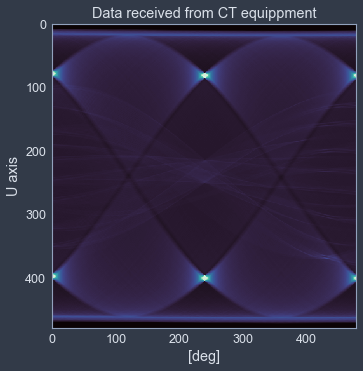

In [3]:
# Show in Markdown
from skimage.transform import radon
from numpy import linspace

n_size = 480
theta = linspace(0, 180, n_size, endpoint=False)
data_ct = radon(img, theta=theta)

jtplot.style(jtstyle)
fig, ax = subplots(nrows=1, ncols=1)
ax.imshow(data_ct, cmap=colormap)
ax.set_title("Data received from CT equippment")
ax.set_ylabel("U axis")
ax.set_xlabel("[deg]")
ax.grid(False)

### 복원한 이미지

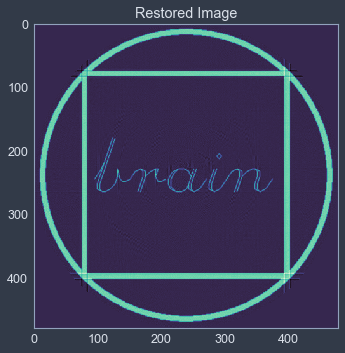

In [4]:
# Show in Markdown
from skimage.transform import iradon

img_restored = iradon(data_ct)
 
jtplot.style(jtstyle)
fig, ax = subplots(nrows=1, ncols=1)
ax.imshow(img_restored, cmap=colormap)
ax.set_title("Restored Image")
ax.grid(False)

## 참고문헌
[1] https://www.medicalradiation.com/types-of-medical-imaging/imaging-using-x-rays/computed-tomography-ct/